# 사전 준비

## 패키지

In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
import IPython.display as disp

# 그래프 스타일
%matplotlib inline
sns.set(style="whitegrid")

## 폰트

In [2]:
# 폰트 경로 지정
font_path = '../src/KoPubWorld Batang Medium.ttf'

# matplotlib에 폰트 등록
fm.fontManager.addfont(font_path)

# 폰트 이름 확인
prop = fm.FontProperties(fname=font_path)
font_name = prop.get_name()
print(f"matplotlib에 등록된 폰트 이름: {font_name}")

# matplotlib의 기본 폰트 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

matplotlib에 등록된 폰트 이름: KoPubWorldBatang


## 함수

In [3]:
# 만 단위 포맷터
def format_man(x, _):
    return f'{x / 10000:.0f}'

# Code

In [4]:
file_path = "../yelp_dataset/yelp_academic_dataset_user.json"

# total lines 미리 세기 (tqdm 활용)
with open(file_path, 'r', encoding='utf-8') as f:
    total_lines = sum(1 for _ in f)

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=total_lines, desc="Loading users"):
        data.append(json.loads(line))

df = pd.DataFrame(data)

Loading users: 100%|██████████| 1987897/1987897 [00:14<00:00, 136619.28it/s]


In [5]:
print("데이터 크기:", df.shape)
print("\n컬럼 목록:\n", df.columns.tolist())
print("\n샘플 데이터:")
display(df.head())

데이터 크기: (1987897, 22)

컬럼 목록:
 ['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']

샘플 데이터:


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [6]:
df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

## 시각화

### 연도별 가입자 수

In [7]:
# yelping_since → 가입 연도 컬럼 생성
df['year_joined'] = pd.to_datetime(df['yelping_since']).dt.year

# friends 컬럼은 쉼표로 구분된 user_id 문자열 → 친구 수로 변환
df['friend_count'] = df['friends'].apply(lambda x: len(x.split(', ')) if x else 0)

# 시각화 공통 설정
def format_millions(x, _):
    return f'{x / 1_000_000:.1f}'

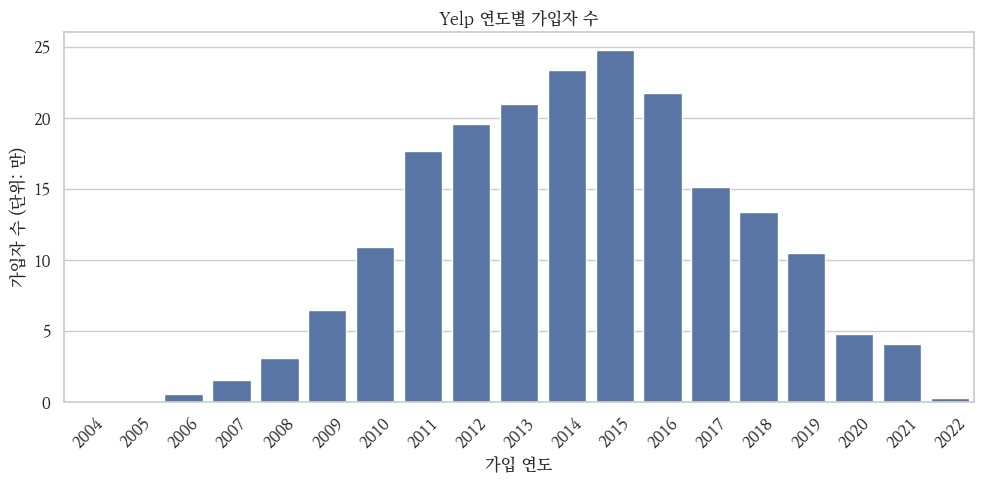

,가입자 수,비율 (%)
가입 연도,,
2004,90,0.00
2005,937,0.05
2006,5423,0.27
2007,15340,0.77
2008,31097,1.56
2009,64911,3.27
2010,109054,5.49
2011,176435,8.88
2012,195955,9.86


In [8]:
# 그래프
plt.figure(figsize=(10, 5))
sns.countplot(x='year_joined', data=df, order=sorted(df['year_joined'].unique()))
plt.title("Yelp 연도별 가입자 수")
plt.xlabel("가입 연도")
plt.ylabel("가입자 수 (단위: 만)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_man))
plt.tight_layout()
plt.show()

# 표 생성
year_counts = df['year_joined'].value_counts().sort_index()
year_ratio = (year_counts / len(df) * 100).round(2)

year_summary = pd.DataFrame({
    '가입자 수': year_counts,
    '비율 (%)': year_ratio
})
year_summary.index.name = '가입 연도'

# 표 출력
disp.display(year_summary)

### 평균 평점 분포

In [9]:
import numpy as np
import pandas as pd

# 평균 별점 복사
stars = df['average_stars']

# 정확히 1.0과 5.0은 먼저 분리
bins_target = stars[(stars > 1.0) & (stars < 5.0)]

# 내부 구간 경계 생성
bin_edges = np.round(np.linspace(1.0, 5.0, 13), 3)  # 12구간 → 13개 경계
# 예: [1.0, 1.333, 1.667, ..., 4.667, 5.0]

# 라벨 생성
bin_labels = [f"({bin_edges[i]:.3f}–{bin_edges[i+1]:.3f}]" for i in range(len(bin_edges)-1)]

# 잘라낸 구간만 cut
cut_result = pd.cut(bins_target, bins=bin_edges, labels=bin_labels, right=True, include_lowest=False)

# 결과 컬럼 생성
# 결과 컬럼 생성 (object 타입)
df['avg_star_bin'] = pd.Series(dtype="object")

df.loc[stars == 1.0, 'avg_star_bin'] = '1.0'
df.loc[stars == 5.0, 'avg_star_bin'] = '5.0'
df.loc[(stars > 1.0) & (stars < 5.0), 'avg_star_bin'] = cut_result

# 라벨 순서 정렬용 리스트
final_labels = ['1.0'] + bin_labels + ['5.0']

In [10]:
# 사용자 수 및 비율 계산
bin_counts = df['avg_star_bin'].value_counts().reindex(final_labels)
bin_percent = (bin_counts / len(df) * 100).round(2)

star_summary = pd.DataFrame({
    '사용자 수': bin_counts,
    '비율 (%)': bin_percent
})
star_summary.index.name = '평균 별점 구간'

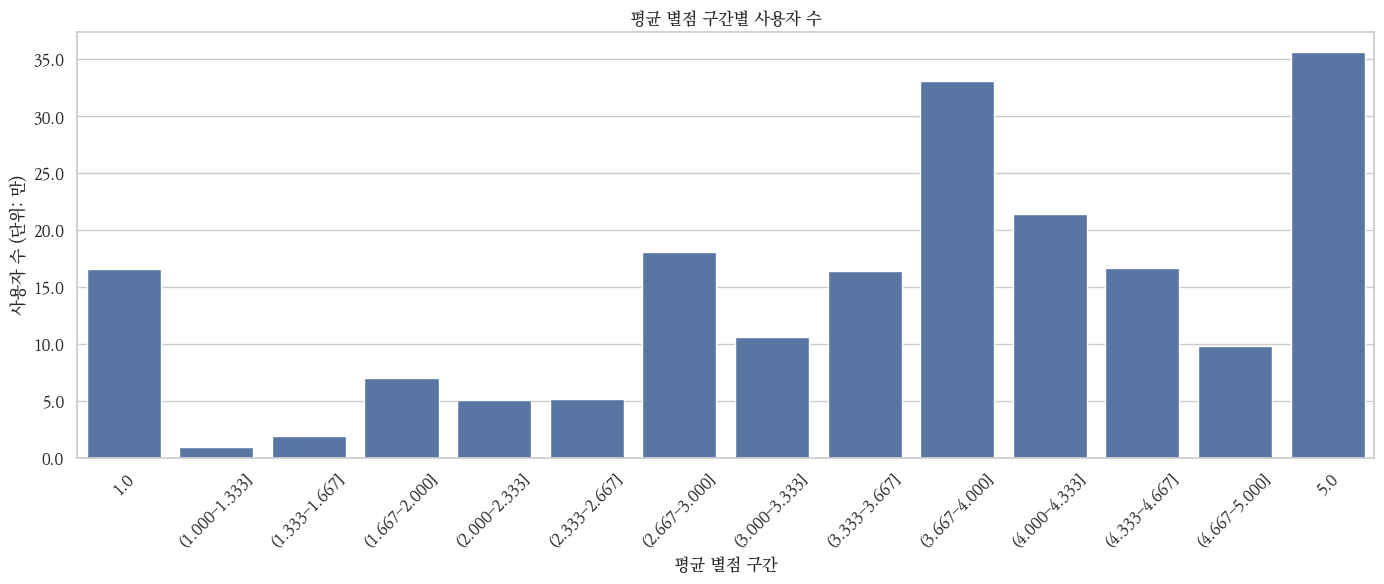

In [11]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

def format_man(x, _):
    return f'{x / 10000:.1f}'

plt.figure(figsize=(14, 6))
sns.barplot(x=star_summary.index, y=star_summary['사용자 수'])

plt.title("평균 별점 구간별 사용자 수")
plt.xlabel("평균 별점 구간")
plt.ylabel("사용자 수 (단위: 만)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_man))
plt.tight_layout()
plt.show()

In [12]:
from IPython.display import display

display(star_summary)

,사용자 수,비율 (%)
평균 별점 구간,,
1.0,165899,8.35
(1.000–1.333],10015,0.50
(1.333–1.667],19183,0.96
(1.667–2.000],70033,3.52
(2.000–2.333],51076,2.57
(2.333–2.667],52150,2.62
(2.667–3.000],180589,9.08
(3.000–3.333],106617,5.36
(3.333–3.667],164532,8.28


## 기타

### 리뷰 수

In [13]:
# 기본 통계 계산
review_stats = {
    "최소값": df['review_count'].min(),
    "최대값": df['review_count'].max(),
    "평균": round(df['review_count'].mean(), 2),
    "중앙값": df['review_count'].median(),
    "상위 10% 기준값": df['review_count'].quantile(0.9),
    "상위 1% 기준값": df['review_count'].quantile(0.99)
}

# 출력
print("리뷰 수 기본 통계")
for k, v in review_stats.items():
    print(f"{k}: {v}")

# 최대 리뷰 수
max_review = df['review_count'].max()

# 구간 경계 설정
bins = [0, 1, 5]  # 0, 1–4, 5–9 시작점
# 10부터 100까지 10 단위로 경계 추가
bins.extend(range(10, 101, 10))
bins.append(max_review + 1)  # 100 이상 구간 끝 경계

# 구간 라벨 설정
labels = ["0개", "1–4개", "5–9개"]
labels.extend([f"{i}–{i+9}개" for i in range(10, 100, 10)])
labels.append("100개 이상")

# 구간화
df['review_count_bin'] = pd.cut(
    df['review_count'],
    bins=bins,
    labels=labels,
    right=False,   # 왼쪽 포함, 오른쪽 미포함
    include_lowest=True
)

# 사용자 수 & 비율 계산
count_table = df['review_count_bin'].value_counts().reindex(labels)
percent_table = (count_table / len(df) * 100).round(2)

review_summary = pd.DataFrame({
    '사용자 수': count_table,
    '비율 (%)': percent_table
})
review_summary.index.name = '리뷰 수 구간'

display(review_summary)

리뷰 수 기본 통계
최소값: 0
최대값: 17473
평균: 23.39
중앙값: 5.0
상위 10% 기준값: 47.0
상위 1% 기준값: 311.0


,사용자 수,비율 (%)
리뷰 수 구간,,
0개,54,0.00
1–4개,900749,45.31
5–9개,360575,18.14
10–19개,290021,14.59
20–29개,128656,6.47
30–39개,72253,3.63
40–49개,46037,2.32
50–59개,31802,1.60
60–69개,23112,1.16


### 팬

In [14]:
# 기본 통계
fans_stats = {
    "최소값": df['fans'].min(),
    "최대값": df['fans'].max(),
    "평균": df['fans'].mean(),
    "중앙값": df['fans'].median()
}

print("팬 수 기본 통계:")
for k, v in fans_stats.items():
    print(f"{k}: {v}")

# 최대 팬 수 확인
max_fans = df['fans'].max()

# 구간 경계 설정
bins = [0, 1, 5, 10, 20, max_fans + 1]

# 구간 라벨 설정
labels = ["0명", "1–4명", "5–9명", "10–19명", "20명 이상"]

# pd.cut으로 구간화
df['fans_bin'] = pd.cut(
    df['fans'],
    bins=bins,
    labels=labels,
    right=False,   # 왼쪽 포함, 오른쪽 미포함
    include_lowest=True
)

# 각 구간별 사용자 수 & 비율 계산
count_table = df['fans_bin'].value_counts().reindex(labels)
percent_table = (count_table / len(df) * 100).round(2)

fans_summary = pd.DataFrame({
    '사용자 수': count_table,
    '비율 (%)': percent_table
})
fans_summary.index.name = '팬 수 구간'

# 표 출력
display(fans_summary)

팬 수 기본 통계:
최소값: 0
최대값: 12497
평균: 1.4657404282012598
중앙값: 0.0


,사용자 수,비율 (%)
팬 수 구간,,
0명,1577870,79.37
1–4명,317335,15.96
5–9명,41104,2.07
10–19명,24705,1.24
20명 이상,26883,1.35


### 친구

In [15]:
# 최대 친구 수
max_friends = df['friend_count'].max()

# 구간 경계 설정
bins = [0, 1, 5, 10, 20, 50, 100, 200, max_friends + 1]

# 구간 라벨 설정
labels = ["0명", "1–4명", "5–9명", "10–19명", "20–49명", "50–99명", "100–199명", "200명 이상"]

# 구간화
df['friend_count_bin'] = pd.cut(
    df['friend_count'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# 사용자 수와 비율 계산
count_table = df['friend_count_bin'].value_counts().reindex(labels)
percent_table = (count_table / len(df) * 100).round(2)

friend_summary = pd.DataFrame({
    '사용자 수': count_table,
    '비율 (%)': percent_table
})
friend_summary.index.name = '친구 수 구간'

# 기본 통계
friend_stats = {
    "최소값": df['friend_count'].min(),
    "최대값": max_friends,
    "평균": round(df['friend_count'].mean(), 2),
    "중앙값": df['friend_count'].median(),
    "상위 10% 기준값": df['friend_count'].quantile(0.9),
    "상위 1% 기준값": df['friend_count'].quantile(0.99)
}

print("친구 수 기본 통계")
for k, v in friend_stats.items():
    print(f"{k}: {v}")

display(friend_summary)

친구 수 기본 통계
최소값: 1
최대값: 14995
평균: 53.38
중앙값: 2.0
상위 10% 기준값: 159.0
상위 1% 기준값: 593.0


,사용자 수,비율 (%)
친구 수 구간,,
0명,0,0.00
1–4명,1120572,56.37
5–9명,94943,4.78
10–19명,107849,5.43
20–49명,183337,9.22
50–99명,170777,8.59
100–199명,158509,7.97
200명 이상,151910,7.64
